In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [2]:
palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [3]:
data = pd.read_csv('distance2F.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario
0,407472,1,1,1,1,48.59900,0.000213,1.456490,55.0012,865057336,...,566137,1101413,1.00493,1.00493,121.000,121.000,120.3500,824575.0,ns3::ThompsonSamplingWifiManager,A
1,407472,2,1,1,1,48.29050,0.000210,1.453510,55.3470,870249480,...,569535,1101413,1.03520,1.03520,120.996,120.996,119.8320,827826.0,ns3::ThompsonSamplingWifiManager,A
2,407472,1,1,3,1,48.59900,0.000213,1.456490,55.0012,865057336,...,566137,1101413,1.00493,1.00493,121.000,121.000,120.3500,824575.0,ns3::ThompsonSamplingWifiManager,A
3,407472,2,1,3,1,48.29070,0.000210,1.453520,55.3468,870246424,...,569533,1101413,1.03520,1.03520,120.996,120.996,119.8400,827825.0,ns3::ThompsonSamplingWifiManager,A
4,407472,1,1,1,2,4.81836,0.000022,0.153676,101.8510,1601868104,...,1048343,1101413,1.00803,1.00803,121.000,121.000,22.9148,161106.0,ns3::ThompsonSamplingWifiManager,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,407477,2,1,27,3,26.74950,0.000162,1.184380,78.3915,1232776648,...,806791,1101413,1.01931,1.01931,120.998,120.998,130.7530,955547.0,ns3::ThompsonSamplingWifiManager,E
328,407477,1,1,29,3,56.50280,0.000404,1.621050,46.5662,732040352,...,479084,1101413,1.04024,1.04024,120.977,120.977,193.7320,776621.0,ns3::ThompsonSamplingWifiManager,E
329,407477,2,1,29,3,33.98690,0.000195,1.280980,70.6452,1110973656,...,727077,1101413,1.01931,1.01931,121.000,121.000,141.5250,931372.0,ns3::ThompsonSamplingWifiManager,E
330,407477,1,1,31,3,61.76050,0.000389,1.798200,40.9415,643555400,...,421175,1101413,1.07407,1.07407,121.000,121.000,163.6820,757357.0,ns3::ThompsonSamplingWifiManager,E


In [4]:
df0 = (
    data.query("flow == 1")                       # zostawiamy tylko flow 0
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow'], as_index=False)
        .sum(numeric_only=True)   # zachowaj kolumnę flow
)

#  Flow 1
df1 = (
    data.query("flow == 2")
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow'], as_index=False)
        .sum(numeric_only=True)
)

#  Suma flow 0 + 1
df_sum = (
    data
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun'], as_index=False)
        .mean(numeric_only=True)
        .assign(flow='1+2')                       # sztuczna etykieta – tylko żeby było wiadomo
)

In [5]:
df_sum

,scenario,distance,linksNumber,rngRun,flow,nStations,loss,jitter,latency,throughput,rxBytes,txBytes,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum
0,A,1,1,407472,1+2,1.0,48.44475,0.000211,1.455000,55.17410,8.676534e+08,1.682959e+09,567836.0,1101413.0,1.020065,1.020065,120.9980,120.9980,120.0910,826200.5
1,A,1,1,407473,1+2,1.0,48.38515,0.000211,1.442745,55.23965,8.686565e+08,1.682959e+09,568492.5,1101413.0,1.022320,1.022320,120.9965,120.9965,119.9640,820183.0
2,A,1,1,407474,1+2,1.0,48.32815,0.000211,1.446665,55.29545,8.696154e+08,1.682959e+09,569120.0,1101413.0,1.012565,1.012565,120.9980,120.9980,119.8985,823327.0
3,A,3,1,407472,1+2,1.0,48.44485,0.000212,1.455005,55.17400,8.676519e+08,1.682959e+09,567835.0,1101413.0,1.020065,1.020065,120.9980,120.9980,120.0950,826200.0
4,A,3,1,407473,1+2,1.0,48.34300,0.000211,1.437470,55.28240,8.693663e+08,1.682959e+09,568957.0,1101413.0,1.020130,1.020130,120.9995,120.9995,119.9170,817854.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,E,27,3,407477,1+2,1.0,39.54225,0.000218,1.336985,64.70490,1.017479e+09,1.682959e+09,665889.5,1101413.0,1.029505,1.029505,120.9990,120.9990,137.1045,868781.0
162,E,29,3,407476,1+2,1.0,44.99905,0.000298,1.441055,58.86000,9.256441e+08,1.682959e+09,605788.0,1101413.0,1.020350,1.020350,120.9995,120.9995,167.6830,852644.0
163,E,29,3,407477,1+2,1.0,45.24485,0.000300,1.451015,58.60570,9.215070e+08,1.682959e+09,603080.5,1101413.0,1.029775,1.029775,120.9885,120.9885,167.6285,853996.5
164,E,31,3,407476,1+2,1.0,48.81270,0.000312,1.548045,54.77985,8.614620e+08,1.682959e+09,563784.0,1101413.0,1.024345,1.024345,121.0000,121.0000,165.0945,838952.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\573328726.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\573328726.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\573328726.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


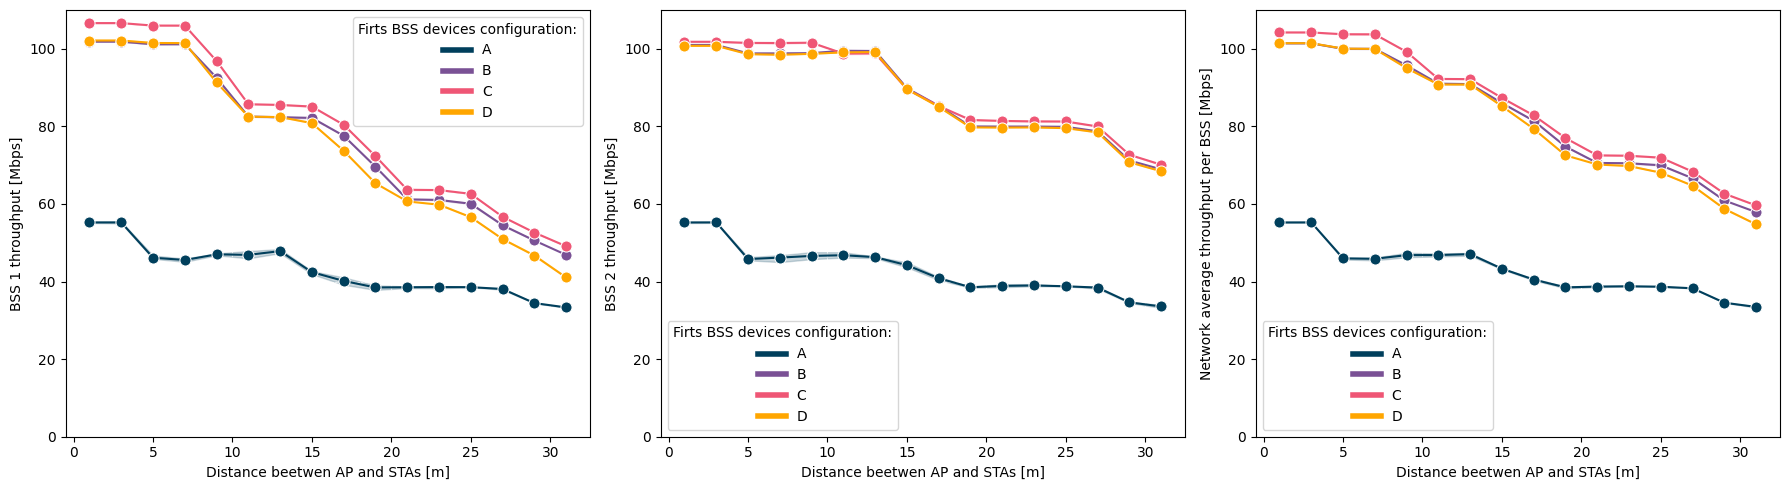

In [6]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Distance beetwen AP and STAs [m]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'BSS 1 throughput [Mbps]'),
    (df1, 'BSS 2 throughput [Mbps]'),
    (df_sum, 'Network average throughput per BSS [Mbps]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='throughput', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    for handle in handles:
        handle.set_linewidth(4) 
    axes[i].legend(
        handles=handles[1:8],
        labels=['A', 'B', 'C', 'D'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='Firts BSS devices configuration:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 110)
    else:
        axes[i].set_ylim(0, 110) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_thr_flows.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\2015048094.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\2015048094.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\2015048094.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


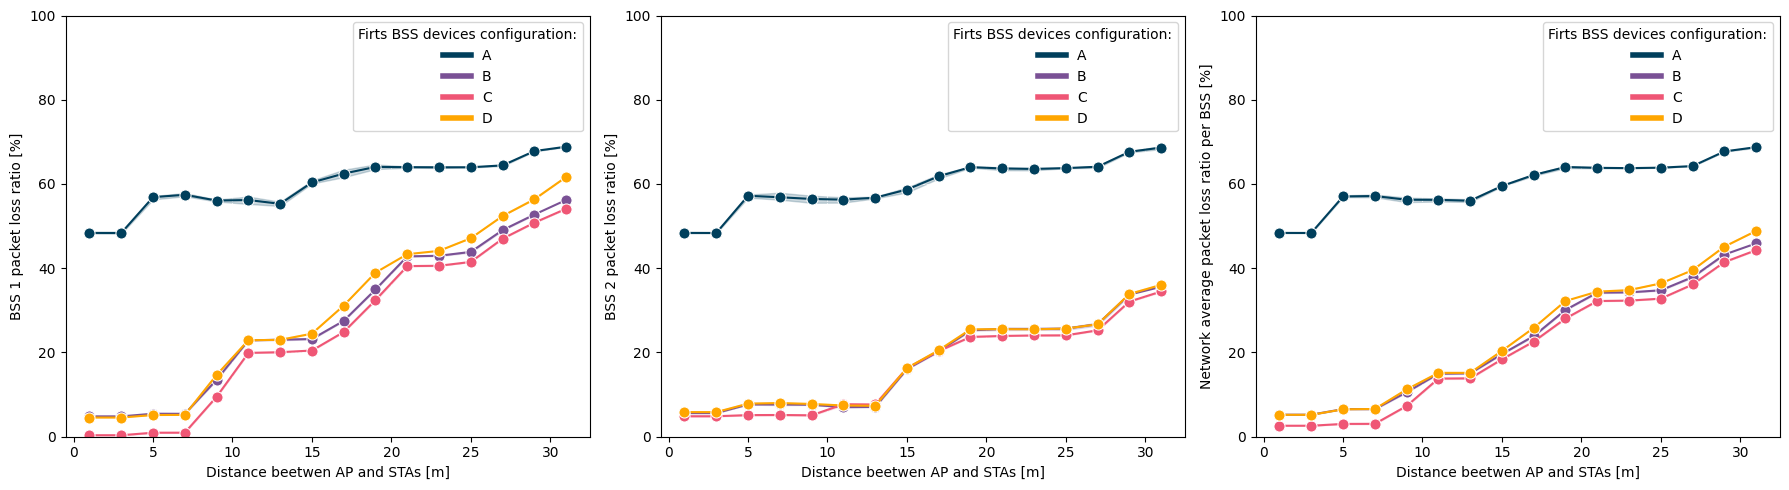

In [7]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Distance beetwen AP and STAs [m]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'BSS 1 packet loss ratio [%]'),
    (df1, 'BSS 2 packet loss ratio [%]'),
    (df_sum, 'Network average packet loss ratio per BSS [%]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='loss', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    for handle in handles:
        handle.set_linewidth(4) 
    axes[i].legend(
        handles=handles[1:8],
        labels=['A', 'B', 'C', 'D'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='Firts BSS devices configuration:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 100) 
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_loss_flows.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\785399585.py:27: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\785399585.py:27: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\785399585.py:27: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


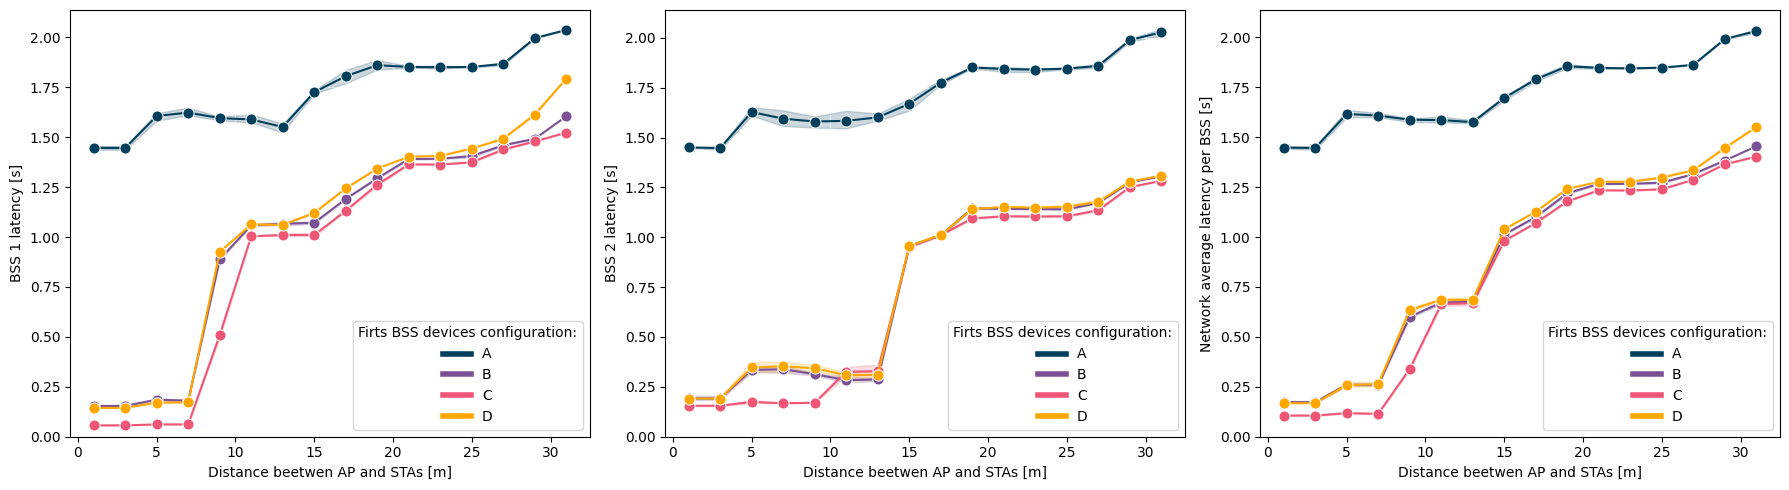

In [8]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'BSS 1 latency [s]'),
    (df1, 'BSS 2 latency [s]'),
    (df_sum, 'Network average latency per BSS [s]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='latency', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    for handle in handles:
        handle.set_linewidth(4) 
    axes[i].legend(
        handles=handles[1:8],
        labels=['A', 'B', 'C', 'D'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='Firts BSS devices configuration:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0) 
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_lat_flows.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\374019600.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\374019600.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_137128\374019600.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


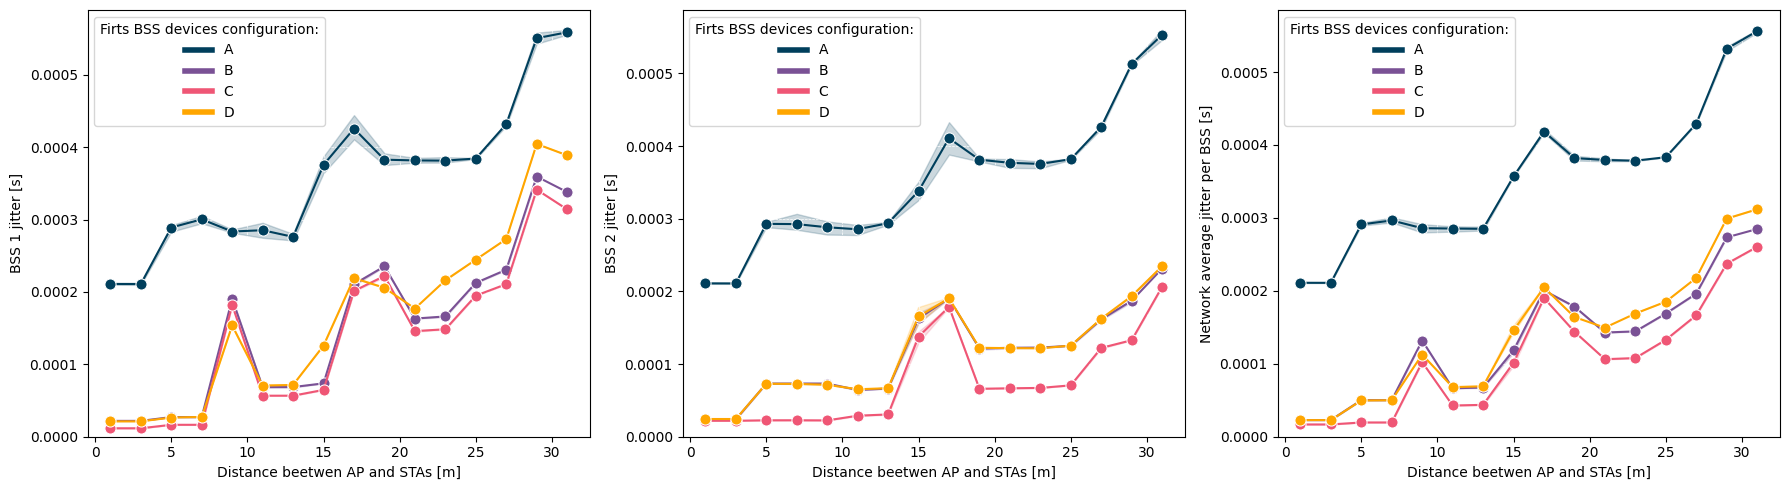

In [9]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Distance beetwen AP and STAs [m]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'BSS 1 jitter [s]'),
    (df1, 'BSS 2 jitter [s]'),
    (df_sum, 'Network average jitter per BSS [s]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='distance', y='jitter', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    for handle in handles:
        handle.set_linewidth(4) 
    axes[i].legend(
        handles=handles[1:8],
        labels=['A', 'B', 'C', 'D'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='Firts BSS devices configuration:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0) 
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_jit_flows.svg', bbox_inches='tight')
plt.show()